In [1]:
import tensorflow as tf

from tensorflow.keras import datasets, layers, models
import matplotlib.pyplot as plt

In [2]:
(train_images, train_labels), (test_images, test_labels) = datasets.cifar10.load_data()   #Download and prepping dataset

# Normalize pixel values to be between 0 and 1
train_images, test_images = train_images / 255.0, test_images / 255.0

170498071/170498071 [==============================] - 4s 0us/step


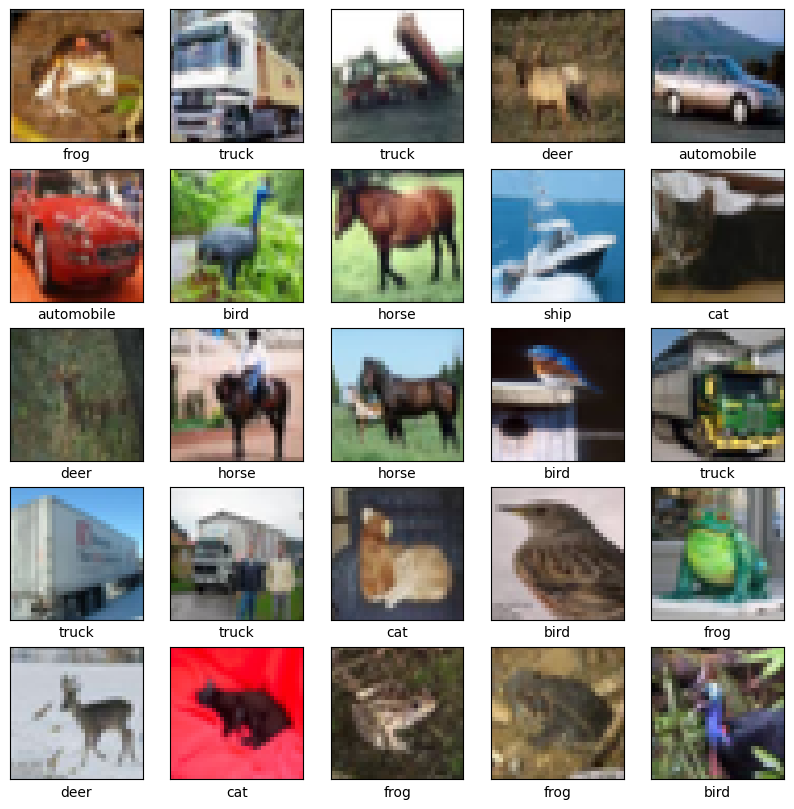

In [3]:
class_names = ['airplane', 'automobile', 'bird', 'cat', 'deer',
               'dog', 'frog', 'horse', 'ship', 'truck']#Verification of the data

plt.figure(figsize=(10,10))
for i in range(25):
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(train_images[i])
    # The CIFAR labels happen to be arrays,
    # which is why you need the extra index
    plt.xlabel(class_names[train_labels[i][0]])
plt.show()

In [5]:
model = models.Sequential()
model.add(layers.Conv2D(32, (3, 3), activation='relu', input_shape=(32, 32, 3)))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))

#This is a stack of Conv2D and MaxPooling2D layers
#Conv2D:The Conv2D layer is a 2D convolution layer in a neural network. It is responsible for convolving filters/kernels over the input image to extract features. Here's what the parameters mean:
#Filters (or Kernels): These are small windows that move across the input image. Each filter detects specific patterns or features.
#Kernel Size: Specifies the size of the filters. A kernel size of (3, 3) means a 3x3 filter.
#Activation Function: This is the non-linear activation function applied to the output of each convolutional operation. 'relu' (Rectified Linear Unit) is a common choice for image classification tasks.
#Input Shape: Specifies the shape of the input data. For an image with three color channels (e.g., RGB), an input shape of (32, 32, 3) represents a 32x32 image with three color channels.

#MaxPool2D:The MaxPooling2D layer is a pooling layer that performs down-sampling by selecting the maximum value from a group of neighboring pixels. This reduces the spatial dimensions of the input volume and helps the model become more invariant to small translations and distortions. Key parameters include:

#Pool Size: Specifies the size of the pooling window. A pool size of (2, 2) means a 2x2 window.

In [6]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_3 (Conv2D)           (None, 30, 30, 32)        896       
                                                                 
 max_pooling2d_2 (MaxPoolin  (None, 15, 15, 32)        0         
 g2D)                                                            
                                                                 
 conv2d_4 (Conv2D)           (None, 13, 13, 64)        18496     
                                                                 
 max_pooling2d_3 (MaxPoolin  (None, 6, 6, 64)          0         
 g2D)                                                            
                                                                 
 conv2d_5 (Conv2D)           (None, 4, 4, 64)          36928     
                                                                 
Total params: 56320 (220.00 KB)
Trainable params: 5632

In [9]:
model.add(layers.Flatten())
model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dense(10))

#Add layers on the top

In [10]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_3 (Conv2D)           (None, 30, 30, 32)        896       
                                                                 
 max_pooling2d_2 (MaxPoolin  (None, 15, 15, 32)        0         
 g2D)                                                            
                                                                 
 conv2d_4 (Conv2D)           (None, 13, 13, 64)        18496     
                                                                 
 max_pooling2d_3 (MaxPoolin  (None, 6, 6, 64)          0         
 g2D)                                                            
                                                                 
 conv2d_5 (Conv2D)           (None, 4, 4, 64)          36928     
                                                                 
 flatten (Flatten)           (None, 1024)             

In [11]:
model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

history = model.fit(train_images, train_labels, epochs=10,
                    validation_data=(test_images, test_labels))
#The fit method trains the model on the provided data for the specified number of epochs. The training process updates the model's weights based on the optimization algorithm and the chosen loss function.
#After training, the training history (history) contains information about the training and validation metrics over each epoch

Epoch 1/10
1563/1563 [==============================] - 79s 49ms/step - loss: 1.6624 - accuracy: 0.3775 - val_loss: 1.3820 - val_accuracy: 0.4936
Epoch 2/10
1563/1563 [==============================] - 73s 47ms/step - loss: 1.2542 - accuracy: 0.5460 - val_loss: 1.1964 - val_accuracy: 0.5665
Epoch 3/10
1563/1563 [==============================] - 73s 47ms/step - loss: 1.1066 - accuracy: 0.6030 - val_loss: 1.1147 - val_accuracy: 0.6036
Epoch 4/10
1563/1563 [==============================] - 70s 45ms/step - loss: 0.9955 - accuracy: 0.6477 - val_loss: 1.0611 - val_accuracy: 0.6269
Epoch 5/10
1563/1563 [==============================] - 70s 45ms/step - loss: 0.9155 - accuracy: 0.6793 - val_loss: 0.9958 - val_accuracy: 0.6545
Epoch 6/10
1563/1563 [==============================] - 68s 43ms/step - loss: 0.8488 - accuracy: 0.7010 - val_loss: 0.9586 - val_accuracy: 0.6643
Epoch 7/10
1563/1563 [==============================] - 66s 42ms/step - loss: 0.8021 - accuracy: 0.7201 - val_loss: 0.9212 -

Model Evaluation

313/313 - 3s - loss: 0.8939 - accuracy: 0.6995 - 3s/epoch - 11ms/step


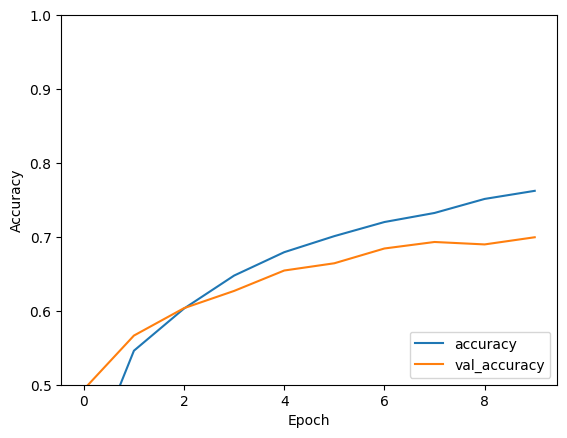

In [12]:
plt.plot(history.history['accuracy'], label='accuracy')
plt.plot(history.history['val_accuracy'], label = 'val_accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.ylim([0.5, 1])
plt.legend(loc='lower right')

test_loss, test_acc = model.evaluate(test_images,  test_labels, verbose=2)

In [13]:
print(test_acc)

0.6995000243186951
